In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
#read in data
data_path = "/home/kishen/documents/python_projects/disaster_tweets/data/"
df = pd.read_csv(data_path + "clean_tweets.csv")

Preprocessing

In [3]:
os.chdir("/home/kishen/documents/python_projects/disaster_tweets/")
from src.processing import tokenizer

from sklearn.model_selection import train_test_split

#Split data
X, y = df['text'], df['target'].values

#Process text
tokens = X.apply(tokenizer)
text = tokens.map(' '.join)

X_train, X_test, y_train, y_test = train_test_split(text, y, test_size= .2, shuffle=True)

#Sanity Check
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8978,) (8978,)
(2245,) (2245,)


In [4]:
#create vanilla bow word vectors
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

train_bow= vectorizer.fit_transform(X_train)
test_bow = vectorizer.transform(X_test)

print("Size of training vocabulary:", len(vectorizer.get_feature_names_out()))


Size of training vocabulary: 22540



**Baseline Log Reg w/ One-hot Encoding**
- Vanilla encodings
- Vanilla logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
from src.evaluation import Metrics

#train model
lr_base = LogisticRegression(max_iter = 200, random_state=24)
lr_base.fit(train_bow, y_train)

preds = lr_base.predict(train_bow)

base_evaluation = Metrics(preds, y_train)
base_evaluation.metrics()


{'accuracy': 0.9824014257072845, 'precision': 0.9122699386503067, 'recall': 0.9900133155792277, 'f1': 0.9495530012771392}


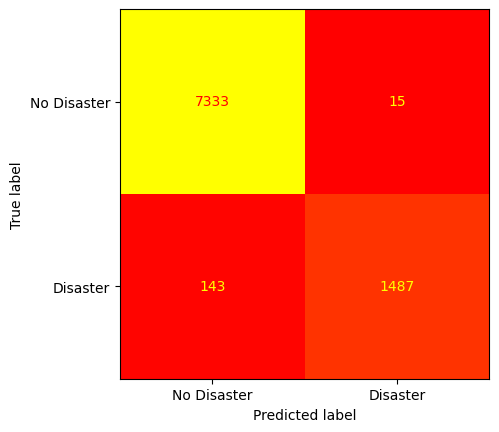

In [6]:
base_evaluation.confusion_matrix(class_labels=["No Disaster", "Disaster"])

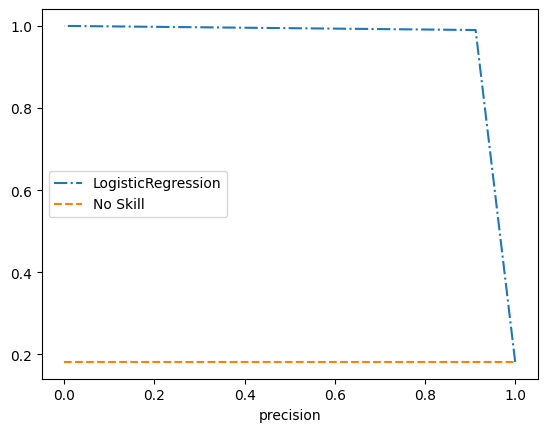

In [7]:
base_evaluation.precision_recall_curve(model_type = "LogisticRegression")


In [8]:

#deploy base model on test
print("Test Data Accuracy:", lr_base.score(test_bow, y_test))



Test Data Accuracy: 0.8957683741648107


In [9]:


#save baseline model
import joblib

filename = "/home/kishen/documents/python_projects/disaster_tweets/saved_models/baseline_logreg.joblib"
joblib.dump(lr_base, filename)


['/home/kishen/documents/python_projects/disaster_tweets/saved_models/baseline_logreg.joblib']